<a href="https://colab.research.google.com/github/woodjmichael/PV-based-systems-lab/blob/main/Neural%20Network%20Regression%20Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Forecast Seminar**

PV-Based Systems Lab

Michael Wood, PhD Candidate

2024-3-22

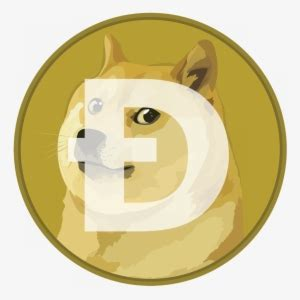

---


# Objectives

1. Learn the basic function of an artificial neuron
2. Perform the math of an artificial neuron
3. See how to prepare data for supervised learning
4. Train neural network and analyze results
5. See how hyperparameters change results
6. Basic familiarity with python and Google Colab

# Basics of Forecasting

![](https://cienciadedatos.net/images/forecasting_multi-step_en.gif)

_(src Skforecast)_

### Forecasting


- Predict future patterns from past ones
- Big assumption: patterns in the past data will continue in the future
  - For linear growth (image aboe), use a linear forecast model
  - For exponential growth (image aboe), use an exponential forecast model
  - For constant statistical variation (coin toss), use a statistical model

### Time series
- Timeseries: a dataset where values are indexed according to time, often at a fixed interval
  - E.g. Each day we get a new price of a cryptocurrency


### Regression

| |Input|Output|Example|
|---|---|---|---|
|Regression|x|y|Use current temperature to predict current Uber rides|
|Auto-regression|past y|future y|use past Uber rides to predict future Uber rides|




# Neural Networks

![](https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/202211/MIT-Neural-Networks-01_0.gif?itok=JNbooIWQ)

_MIT Study Urges Caution When Comparing Neural Networks to Brain (src MIT News)_

### Big ideas
- Type of machine learning model _inspired_ by brain neurons
- Single neuron is simple: weighted sum, then a nonlinear output filter
- Network is just many neurons in parallel and multiple layers
- More neurons -> more complexity -> more ["emergent behavior"](https://photos.app.goo.gl/nq9yhxSx3UfCAKsv5)
- **Not** always better for forecasting than..
  - Traditional methods (e.g. linear regression)
  - Simple baseline models (e.g. persistence, $y(t+1) = y(t)$ )

### Artificial neuron

![](https://cdn.hashnode.com/res/hashnode/image/upload/v1671022628036/8ZZPKZRdW.gif?auto=format,compress&gif-q=60&format=webm)

_(src Adarsh Bhadauria's Blog)_

Natural and artifical neurons both:
- Have multiple inputs, single output (but can go to multiple other neurons)
- Do weighted sum on inputs
- Do "Processing" (nonlinear output filter)

### Activation function

- It's a "non-linear output filter"
    - Non-linear because double the input does not necesssarily mean double the output

There are many activation functions
 - ReLU (rectified linear unit): very fast to calculate
 - Sigmoid (σ): useful for error back propagation

 Activation functions are especially important regarding training.

 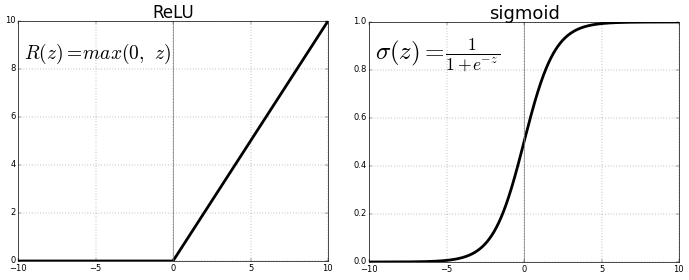

### Single input neuron

- Note that the activation function operator (e.g. σ)

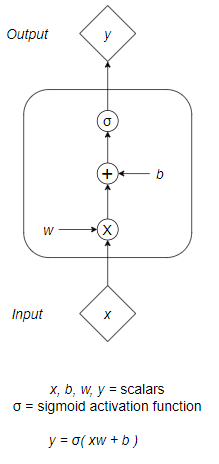

### Multiple inputs

### Multiple neurons (network)

- Each input is typically given to each neuron
- Each neuron still only produces one output
- Each neuron has their own separate weights and biases

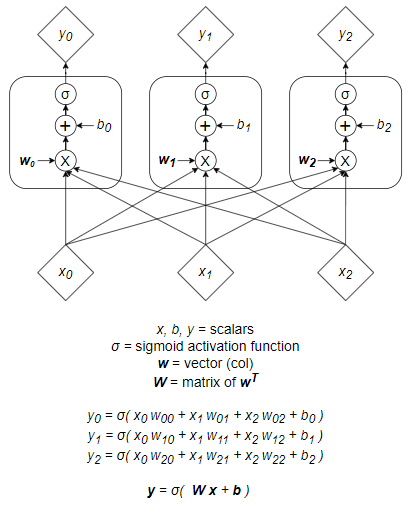

### Mutiple layers

Now when we add a new layer we truly start to see emergent behavior. 

- The outputs of the first layer (y) are treated just like they are inputs to a totally different, single-layer model
- In fact we could have constructed this with two separate, single-layer models
- But training would be more difficult

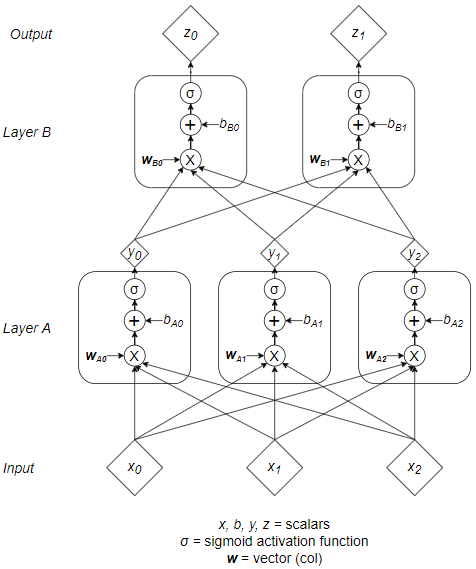

## Training (parameter fitting)

- Training is a large topic and requires understanding the backward propogation of errors and gradient decent. 

- For now consider a close analogy which is fitting a linear function to a set of scattered x-y data points, like you've probably done in excel.

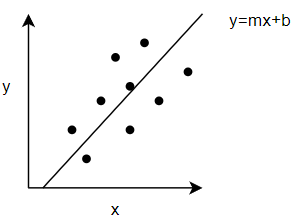

How do you choose $m$ and $b$ such that the line is a best _fit_ for the data? 
- Minimize the distance between the line and all the points
- Well, the mean of those distances
- Really we want the absolute value of the distance, or easier, square the distance (would be bad if distances are negative)
- Therefore objective is to find $m$ and $b$ that minimize the sum (proptional to the mean) of those squares

More or less, this is called the "least squares" algorithm, because when you square the distance from the line to a data point, you can draw a square of that size

Fitting, or training, a machine learning model is similar, except the model is more complex and with more parameters than y=mx+b, and the algorithm different because the model is non-linear and can't be solved easily.

## Hyperparameter tuning

Any ANN model can be specified by the:
- parameters
  - weights
  - biases
- hyperparameters
  - numbers of neurons
  - number of layers
  - activation function used
  - etc

Unfortunatley a lot of machine learning is not analytical, and is instead figured out by experimentation. 

- It's hard to look at your data, do some analytical work, and know the exact number of neurons and type of activation function to use. 

- Therefore we use various methods to experientally determine those hyperparameters. 

- One method is simply by trying many combinations of hyperparameters and choosing the best, which is referred to as grid search.

## Numerical example

- This is the forward pass only on a pre-trained model
- The backward pass (used during training) is more complex and is not covered here

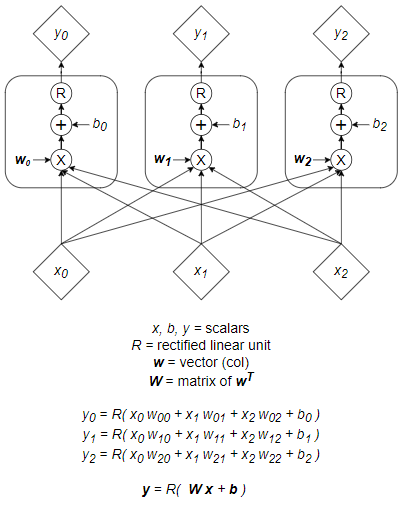

Model 
- neurons (units) = 3
- layers = 1
- inputs = 3
- outputs = 3
- activation function = ReLU (easier calc)

Weights and Biases
- $W_{00} = 1.1$
- $W_{01} = 1.2$
- $W_{02} = 1.3$
- $W_{10} = 1.4$
- $W_{11} = 1.5$
- $W_{12} = 1.6$
- $W_{20} = 1.7$
- $W_{21} = 1.8$
- $W_{22} = 1.9$
- $b_{0} = 0.1$
- $b_{1} = 0.2$
- $b_{2} = -3$

Inputs (capacity = 100 kW)
- $x_{0} = 10\ kW\ (0.10\ pu)$
- $x_{1} = 15\ kW\ (0.15\ pu)$
- $x_{2} = 20\ kW\ (0.20\ pu)$

Calculations
1. y0 = R( x0 w00 + x1 w01 + x2 w02 + b0 ) = 0.65 pu (65 kW)
2. y1 = R( x0 w10 + x1 w11 + x2 w12 + b1 ) = 0.885 pu (85 kW)
3. y2 = R( x0 w20 + x1 w21 + x2 w22 + b2 ) = 0 pu (100 kW)




# Matlab ➡ python

python can be pretty similar to matlab! Also I wrote some helper functions that will also make this notebook seem more general, or more matlab-like.

What you need to know for now:

1. Packages are like toolboxes/libraries. They're just public code sets (and free) that we can load into our python environment and use. We often give packages a shorter name like `np` for numpy and `pd` for pandas.

2. `keras` and `tensorflow` are two of the most important packages for machine learning. We interact with keras, and tensorflow does the hard math in the background.

3. The package `pandas` is like excel for python. Pandas dataframes are accessed with square brackets like `df['prices']` and `df['2021-1-26']`.

4. The `numpy` arrays (1D, 2D, etc..) and python lists are accessed almost exactly like matlab matrices except the "end" number in an index range (`begin:end`) is exclusive. Also you don't need the first and last indices.

  ```python
  a = [0,1,2,3,4,5] # list
  a[3]   # 3
  a[0:3] # [0,1,2]
  a[:3]  # same ⬆
  a[3:6] # [3,4,5]
  a[3:]  # same ⬆
  ```

5. python is functional..

  ```python
  def add(a,b): # function
    return a+b

  add(1,2) # 3
  ```

6. .. and also objective

  ```python
  from numpy import array # class "array"
  A = array([ [1,2,3],
               [4,5,6] ])
  A.shape # (2,3)

  B = A.reshape(3,2) # method
  B.shape # (3,2)
  ```

7. Etc: 
  - Scripting lanugae (you don't compile)
  - No semi-colon at the end of lines
  - Empty-space in the code has meaning so instead of finishing functions and loops with "end" you just un-indent
  - Google Colab is amazing, use it

Now the actual code.

# Packages

In [ ]:
import pandas as pd   # "excel" for python
import numpy as np    # "matlab" for python

import tensorflow as tf # the magic (from google)

#from keras import Sequential as build_model     # not a typical renaming
#from keras.layers import Dense as ann_layer     # not a typical renaming

from keras.models import Sequential as create_model
from keras.layers import Dense as ann_layer

from matplotlib.pyplot import plot, show, legend, xlabel, ylabel, title

# so we get the same results every time
np.random.seed(42) 
tf.random.set_seed(42)

## Functions

Feel welcome to ignore these.

In [ ]:
def import_data(filename):
  return pd.read_csv( filename, index_col=0, parse_dates=True )['2021']

def slide_window(k):
  global window_begin, window_end # nb: global variables are poor form.
  window_begin = window_begin + 1
  window_end = window_end + 1  

def convert_X_and_y_to_numpy():
  global X_train, y_train, X_test, y_test
  X_train,y_train = np.array(X_train), np.array(y_train) 
  X_test,y_test = np.array(X_test), np.array(y_test) 

def add_third_dimension_to_X():  
  global X_train, X_test, L_w
  # reshape X to proper 3D array
  X_train = X_train.reshape((len(X_train), L_w, 1)) 
  X_test = X_test.reshape((len(X_test), L_w, 1))   

def calc_lengths():
  global y_train, y_test, L_train, L_test, L
  L_train = len(y_train) 
  L_test  = len(y_test)
  L = L_train + L_test

def plot_train_subsets():
  global y_train, yhat_train
  rmse = np.sqrt(np.mean(np.square(y_train - yhat_train)))

  plot(y_train,    label='y_train')
  plot(yhat_train, label='yhat_train') # hat = estimated
  legend()
  xlabel('day of year 2021')
  ylabel('close price')
  #title(f'rmse (kW): {rmse:.3f}')  
  show()  

def plot_test_subsets():
  global y_test, yhat_test
  rmse = np.sqrt(np.mean(np.square(y_test - yhat_test)))

  plot(y_test,    label='y_test')
  plot(yhat_test, label='yhat_test') 
  legend()
  xlabel('day of year 2021')
  ylabel('close price')
  #title(f'rmse (kW): {rmse:.3f}')  
  show()  

def plot_train_loss():
  global history
  loss = history.history['loss'][10:]
  plot(range(10,len(loss)+10), loss, label='model loss')
  legend()
  xlabel('epochs after 10')
  ylabel('mse')
  show()  

# Data

## Upload and Import

Need to upload `DOGE-USD.csv` to colab.

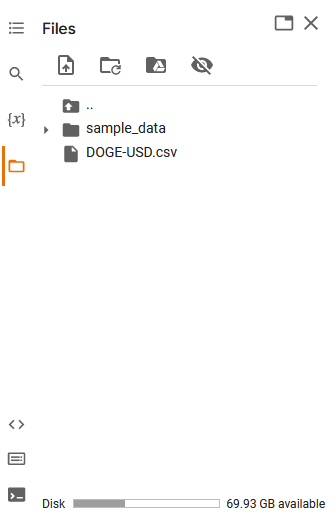

In [ ]:
df = import_data('DOGE-USD.csv')
df # colab will print this

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,0.004681,0.005685,0.004615,0.005685,0.005685,2.289615e+08
2021-01-02,0.005686,0.013698,0.005584,0.010615,0.010615,3.421563e+09
2021-01-03,0.010602,0.013867,0.009409,0.009771,0.009771,2.707004e+09
2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1.372399e+09
2021-01-05,0.009767,0.010219,0.008972,0.009920,0.009920,6.872561e+08
...,...,...,...,...,...,...
2021-11-24,0.226680,0.230245,0.211836,0.221825,0.221825,1.957665e+09
2021-11-25,0.217132,0.228810,0.214317,0.216326,0.216326,1.344827e+09
2021-11-26,0.221047,0.221759,0.190344,0.200887,0.200887,2.231733e+09


We'll focus only on the close price. 

In [ ]:
df[['Close']]

,Close
Date,
2021-01-01,0.005685
2021-01-02,0.010615
2021-01-03,0.009771
2021-01-04,0.009767
2021-01-05,0.009920
...,...
2021-11-24,0.221825
2021-11-25,0.216326
2021-11-26,0.200887


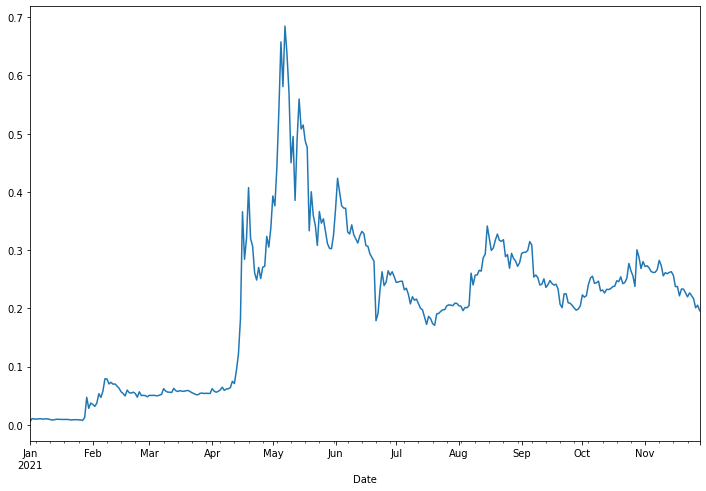

In [ ]:
prices = df['Close']

prices.plot(figsize=(12,8))

## Organize

When we test the model's performance, we want it to be on data that it never saw during training, otherwise we dont know if the model just memorized the data.

- The `train` subset will be the first 90% of the days in our dataset
- Then see how well it performs on the `test` subset (remainging 10%)



In [ ]:
train = list(prices)[:300] # first 90% of days
test = list(prices)[300:]  # remaining 10% of days

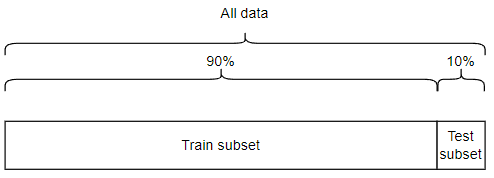

We need to organize the train and test data such that the
- input $X$ to the model is 14 days of data
- and the output $y$ is the 15th day

$X$ is a matrix where
- first row is the first 14 day _window_
- next row is the window _slid_ or shifted ahead one day
- and so on

$y$
- $y$ is just a vector for single-point forecasts
  - e.g. I input 14 data points, my model outputs only 1 data points
  - multi-point e.g.: I input 14 data points, my model outputs 3 data points
- $\hat{y}$ just means the estimated (by the model) value


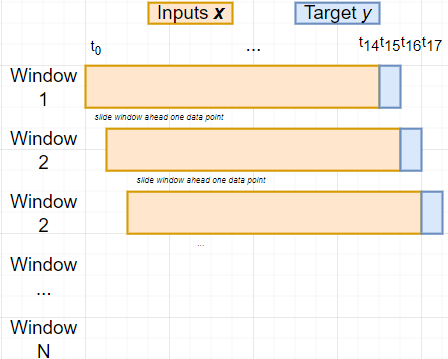

❗❗ one practical issue: $X$ is math but `X` is code, and tensorflow complains if `X` doesn't have a third dimension (the number of features). For us its 1, but we still need a 3D array. So actually: 
- `X` has the shape of (`number_of_windows` , `window_length` , `number_of_features`)

Note the different names:
- window_length is also called sequence_length
- number_of_windows is also called number_of_samples or maybe number_of_batches
- inputs we also call features
- outputs we also call targets, useful in thinking of a literal target that we're trying to hit (but usually miss) (or labels in classification)

So, organize the train subset like is explained above.

In [ ]:
L_w = 14      # window length (days)
X_train = []  # empty list
y_train = []

window_begin = 0                  # t0..
window_end = window_begin + L_w   #     ..t13

while window_end < len(train):
  new_window = train[window_begin:window_end] # nb: python indexing
  X_train.append(new_window)

  target = train[window_end]
  y_train.append(target)

  slide_window(1)


Then the test subset:

In [ ]:
X_test = []
y_test = []

window_begin = 0
window_end = window_begin + L_w

while window_end < len(test):
  inputs = test[window_begin:window_end] # nb: python indexing
  X_test.append(inputs)

  target = test[window_end]
  y_test.append(target)

  slide_window(1)

Some housekeeping (extra annoying steps
- data must be in numpy arrays for tensorflow to use
- each input matrix/array must also have a 3-dimensional shape, even if there is only one feature (like we have)
- and later we'll want to know the length of the train and test arrays

In [ ]:
convert_X_and_y_to_numpy()
add_third_dimension_to_X()
calc_lengths()

# Forecast model (3 neurons)

## Build

- Build the model with a main ANN layer
- and then one final neuron to reduce the output values to a single number
- `input shape` is just `window size` x `number of features` 
- `n_features` is just 1 because we only have one data vector we're using as an input to the model, the close prices
- notice that for a single point forecast we usually want a last layer with just one neuron
  - to condense all the previous layer outputs to one value
  
Training NB  
- We use the `Adam` optimizer, which is a type of stochastic gradient descent
- There's a loss metric you need to define ($MSE$ by default)
- We have done nothing with "validation" (a way to see how well training is going)

In [ ]:
neurons = 3
input_days = 14

model = create_model()

model.add(ann_layer(units=neurons, activation='relu', input_dim=input_days))

model.add(ann_layer(1))

model.compile(  optimizer = 'Adam',
                loss = 'mse', )

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 45        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


## Train

Train (fit) the model on the training data for 100 epochs (cycles throught the entire dataset). This will perform backpropagation through time.

In [ ]:
history = model.fit(X_train, y_train, epochs=100) 

Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 11/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 12/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 13/100
9/9 [==============================] - 0s 3ms/st

## Predict

Predict the results on the training and test data subsets. Again "hat" refers to an estimated value (by the model).

In [ ]:
yhat_train = model.predict(X_train)
yhat_test =  model.predict(X_test)

## Analysis

Remember the training outputs `yhat_train` are made to be nearly equal to the real measurements `y_train` during training. so these two should be very close to each other if training was successful. 

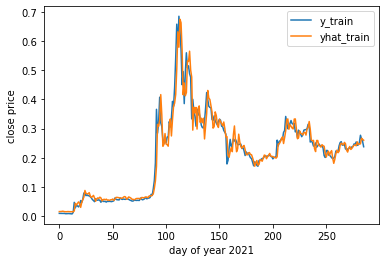

In [ ]:
plot_train_subsets()

The model never saw the `y_test` data during training, so this is a good first attempt at seeing how well it forecasts new data. 

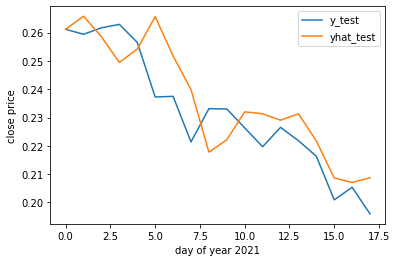

In [ ]:
plot_test_subsets()

_model loss_ is like the inverse of $R^2$ when you're doing a regression fit, in excel for instance. the lower the model loss, the better the _fit_ to the train data. 0 is possible but unlikely. $MSE$ is mean squared error, or $RMSE^2$.

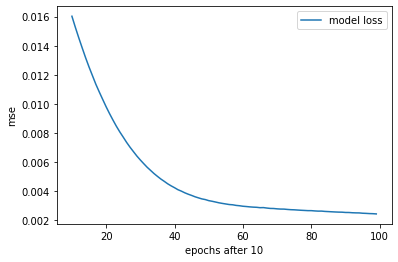

In [ ]:
plot_train_loss() 

# Forecast model (7 neurons, 3 layers)

## Build

- Build the model with a main ANN layer
- and then one final neuron to reduce the output values to a single number
- `input shape` is just `window size` x `number of features` 
- `n_features` is just 1 because we only have one data vector we're using as an input to the model, the close prices
- notice that for a single point forecast we usually want a last layer with just one neuron
  - to condense all the previous layer outputs to one value
  
Training NB  
- We use the `Adam` optimizer, which is a type of stochastic gradient descent
- There's a loss metric you need to define ($MSE$ by default)
- We have done nothing with "validation" (a way to see how well training is going)

In [ ]:
neurons = 7
input_days = 14

model = create_model()

model.add(ann_layer(units=neurons, activation='relu', input_dim=input_days))

model.add(ann_layer(units=neurons, activation='relu', input_dim=input_days))

model.add(ann_layer(units=neurons, activation='relu', input_dim=input_days))

model.add(ann_layer(1))

model.compile(  optimizer = 'Adam',
                loss = 'mse', )

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 7)                 105       
                                                                 
 dense_11 (Dense)            (None, 7)                 56        
                                                                 
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


## Train

Train (fit) the model on the training data for 100 epochs (cycles throught the entire dataset). This will perform backpropagation through time.

In [ ]:
history = model.fit(X_train, y_train, epochs=100) 

Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 11/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 13/100
9/9 [==============================] - 0s 3ms/st

## Predict

Predict the results on the training and test data subsets. Again "hat" refers to an estimated value (by the model).

In [ ]:
yhat_train = model.predict(X_train)
yhat_test =  model.predict(X_test)

## Analysis

Remember the training outputs `yhat_train` are made to be nearly equal to the real measurements `y_train` during training. so these two should be very close to each other if training was successful. 

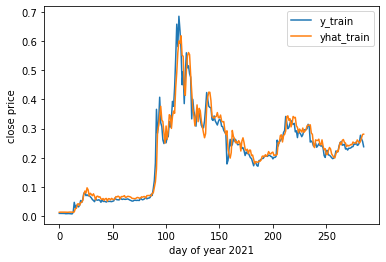

In [ ]:
plot_train_subsets()

The model never saw the `y_test` data during training, so this is a good first attempt at seeing how well it forecasts new data. 

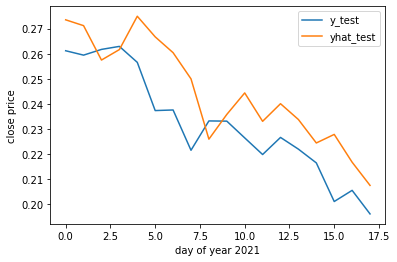

In [ ]:
plot_test_subsets()

_model loss_ is like the inverse of $R^2$ when you're doing a regression fit, in excel for instance. the lower the model loss, the better the _fit_ to the train data. 0 is possible but unlikely. $MSE$ is mean squared error, or $RMSE^2$.

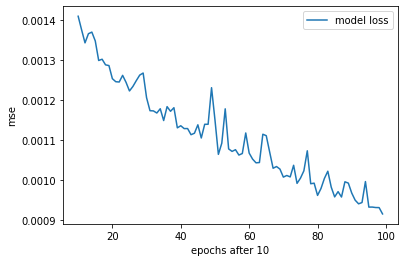

In [ ]:
plot_train_loss() 

# Forecast model (1000 neurons, 5 layers)

## Build

- Build the model with a main ANN layer
- and then one final neuron to reduce the output values to a single number
- `input shape` is just `window size` x `number of features` 
- `n_features` is just 1 because we only have one data vector we're using as an input to the model, the close prices
- notice that for a single point forecast we usually want a last layer with just one neuron
  - to condense all the previous layer outputs to one value
  
Training NB  
- We use the `Adam` optimizer, which is a type of stochastic gradient descent
- There's a loss metric you need to define ($MSE$ by default)
- We have done nothing with "validation" (a way to see how well training is going)

In [ ]:
neurons = 1000
input_days = 14

model = create_model()

model.add(ann_layer(units=neurons, activation='relu', input_dim=input_days))

model.add(ann_layer(units=neurons, activation='relu', input_dim=input_days))

model.add(ann_layer(units=neurons, activation='relu', input_dim=input_days))

model.add(ann_layer(units=neurons, activation='relu', input_dim=input_days))

model.add(ann_layer(units=neurons, activation='relu', input_dim=input_days))

model.add(ann_layer(1))

model.compile(  optimizer = 'Adam',
                loss = 'mse', )

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1000)              15000     
                                                                 
 dense_15 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_16 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_17 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_18 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_19 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 4,020,001
Trainable params: 4,020,001
No

## Train

Train (fit) the model on the training data for 100 epochs (cycles throught the entire dataset). This will perform backpropagation through time.

In [ ]:
history = model.fit(X_train, y_train, epochs=100) 

Epoch 1/100
9/9 [==============================] - 1s 51ms/step - loss: 0.0115
Epoch 2/100
9/9 [==============================] - 0s 48ms/step - loss: 0.0030
Epoch 3/100
9/9 [==============================] - 0s 50ms/step - loss: 0.0014
Epoch 4/100
9/9 [==============================] - 0s 51ms/step - loss: 0.0012
Epoch 5/100
9/9 [==============================] - 1s 59ms/step - loss: 0.0011
Epoch 6/100
9/9 [==============================] - 0s 49ms/step - loss: 7.9568e-04
Epoch 7/100
9/9 [==============================] - 0s 50ms/step - loss: 0.0012
Epoch 8/100
9/9 [==============================] - 0s 51ms/step - loss: 0.0010
Epoch 9/100
9/9 [==============================] - 0s 54ms/step - loss: 9.3352e-04
Epoch 10/100
9/9 [==============================] - 0s 46ms/step - loss: 7.3205e-04
Epoch 11/100
9/9 [==============================] - 0s 47ms/step - loss: 0.0012
Epoch 12/100
9/9 [==============================] - 0s 46ms/step - loss: 0.0011
Epoch 13/100
9/9 [===================

## Predict

Predict the results on the training and test data subsets. Again "hat" refers to an estimated value (by the model).

In [ ]:
yhat_train = model.predict(X_train)
yhat_test =  model.predict(X_test)

## Analysis

Remember the training outputs `yhat_train` are made to be nearly equal to the real measurements `y_train` during training. so these two should be very close to each other if training was successful. 

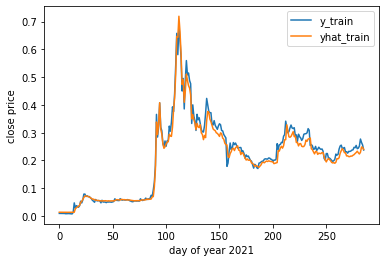

In [ ]:
plot_train_subsets()

The model never saw the `y_test` data during training, so this is a good first attempt at seeing how well it forecasts new data. 

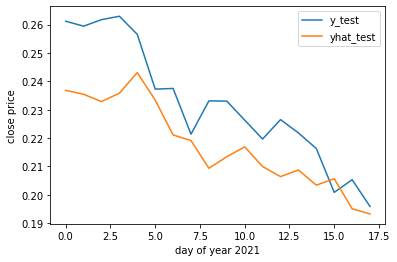

In [ ]:
plot_test_subsets()

_model loss_ is like the inverse of $R^2$ when you're doing a regression fit, in excel for instance. the lower the model loss, the better the _fit_ to the train data. 0 is possible but unlikely. $MSE$ is mean squared error, or $RMSE^2$.

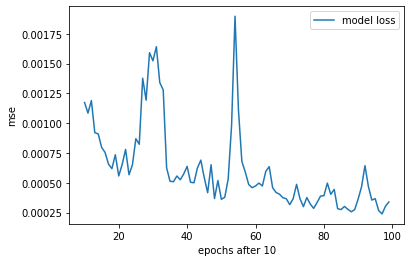

In [ ]:
plot_train_loss() 